# 7주차: 양자역학(슈뢰딩거 방정식1)

## 1. 슈뢰딩거 방정식 소개

### 슈뢰딩거 방정식
#### 파티클(입자)이 특정한 모멘텀(운동량)을 가지고 있을 때, 그 모멘텀에 해당하는 파장을 가진다
- 드브로이 파장(wavelength de Broglie)
- $ \lambda = \frac{h}{p} $
- $\lambda$: 파장, $p$: 모멘텀

#### 파동 $ \Psi (x) = A sin \big(\frac{2 \pi x}{\lambda} \big) $ (시간 t 생략)
#### 미분을 하면 $ \frac{d \Psi}{dx} = A\frac{2\pi}{\lambda}cos \big(\frac{2 \pi x}{\lambda} \big)$
#### 한번더 하면 $ \frac{d^2 \Psi}{dx^2} = -A \big( \frac{2\pi}{\lambda} \big)^2 sin \big(\frac{2 \pi x}{\lambda} \big) = -  \big(\frac{2 \pi}{\lambda} \big)^2 \Psi(x)$   
(첫번째 줄의 식을 대입한 결과)

#### 양변에 $\frac{h^2}{8m\pi^2}$을 곱하면 (그리고 $ \lambda = \frac{h}{p} $를 대입하면)

#### $\frac{h^2}{8m\pi^2}\frac{d^2 \Psi}{dx^2} = - \frac{h^2}{8m\pi^2} \big( \frac{2\pi p}{h} \big)^2 \Psi (x) = - \frac{p^2}{2m}\Psi(x)$

### $-\frac{h^2}{8m\pi^2}\frac{d^2}{dx^2}\Psi (x) = \frac{p^2}{2m}\Psi(x)$
- $\frac{h^2}{8m\pi^2}\frac{d^2}{dx^2}$ : Operator
- $- \frac{p}{2m}$ : Kinetic Energy ($ \frac{1}{2} mv^2$)

#### 양 변에 $V(x)\Psi(x)$를 더하면 ($V(x)$ = potential energy)
### $\big[ -\frac{h^2}{8m\pi^2}\frac{d^2}{dx^2} + V(x) \big]\Psi (x) = \big[-\frac{p}{2m} + V(x) \big] \Psi(x) = E(x)\Psi(x)$
$\because kinetic E + potential E = E$

### 슈뢰딩거 방정식 : $\big[ -\frac{h^2}{8m\pi^2}\frac{d^2}{dx^2} + V(x) \big]\Psi (x) = E(x)\Psi(x)$

## 2. Particle in a box

#### 1)  $V(x) = \infty, x<0 \, or \, x>L$
#### 2)  $V(x) = 0 , 0<x<L$

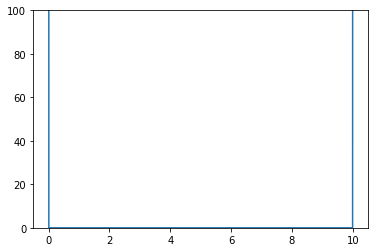

In [2]:
# particle in a box 포텐셜 그리기

import numpy as np
import matplotlib.pyplot as plt

L = 10 # 상자 속 입자의 크기
Vmax = 1000 # 무한

x = np.linspace(0,L,1000)
V = x*0.0  # 2) 일반적인 경우 V=0
V[0] = Vmax  # 1)
V[-1] = Vmax  # 1) x=0, L일 경우 V=무한

plt.plot(x,V)
plt.ylim(0,100)
plt.show()

### 파동함수 
#### $ \psi(x) = \sqrt{\dfrac{2}{L}} \: sin \big( \dfrac{n \pi x}{L} \Big) \;\;\; n=1, 2, 3, ...$
-  $ \sqrt{\dfrac{2}{L}} $ : 파동함수 제곱을 적분할 때 1이 되도록 해줌 (파동함수를 확률에 대한 정보로 사용하기 위한 설정)

### 에너지

$ E_n = \dfrac{n^2h^2}{8mL^2}$
- $n$: 입자의 무게, $h$: 플랑크 상수(ha), $L$:포텐셜 우물의 크기

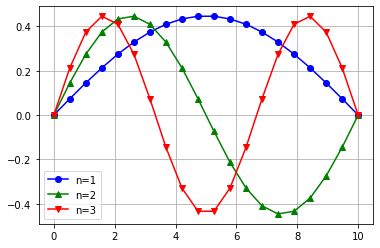

In [38]:
L = 10
x = np.linspace(0,L,20)

def psi(x,n):
    return np.sqrt(2/L) * np.sin(n*np.pi*x/L)

plt.plot(x, psi(x,1), 'bo-', label='n=1')
plt.plot(x, psi(x,2), 'g^-', label='n=2')
plt.plot(x, psi(x,3), 'rv-', label='n=3')

plt.grid(True)
plt.legend()
plt.show()

n 값이 증가함에 따라 node(양 끝단을 제외하고 0이 되는 지점)의 개수가 늘어남

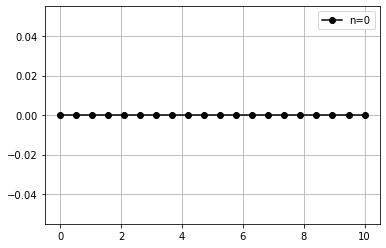

In [17]:
# n = 0인 경우
plt.plot(x, psi(x,0), 'ko-', label='n=0')

plt.grid(True)
plt.legend()
plt.show()

n=0인 경우, 물질 자체가 존재하지 않는 것으로 해석 됨

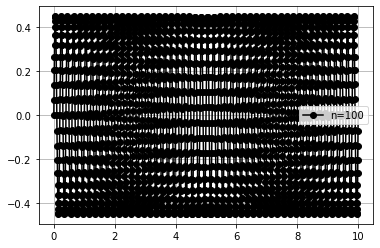

In [20]:
# n이 매우 큰 경우
x = np.linspace(0,L,2000)
plt.plot(x, psi(x,100), 'ko-', label='n=100')

plt.grid(True)
plt.legend()
plt.show()

n이 매우 큰 경우, 거의 모든 지점에서 입자가 발견될 확률이 거의 동일함  
--> 양자역학에서 양자수가 매우 커지면 고전역학과 유사해짐

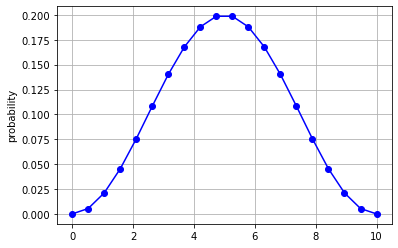

(1.0, 1.1102230246251565e-14)


In [47]:
# 입자가 발견될 확률

plt.ylabel('probability')
plt.grid(True)
plt.plot(x, psi(x,1)**2, 'bo-', label='n=1')

plt.show()

# 전체 범위에서 입자가 발견될 확률의 총 합
from scipy.integrate import quad 

def psi_sqr(x,n):
    psi = np.sqrt(2/L) * np.sin(n*np.pi*x/L)
    return psi**2

sum_prob = quad(psi_sqr, 0,10, args=(1))
print(sum_prob)

## 3. 파동함수 이해 및 분석

#### $ \psi(x) = \sqrt{\dfrac{2}{L}} \: sin \big( \dfrac{n \pi x}{L} \Big) \;\;\; n=1, 2, 3, ...$

#### $ E_n = \dfrac{n^2h^2}{8mL^2}$

#### $h = 6.62607015 \times 10^{-34} J \cdot s = 4.135667696 \times 10^{-15}eV \cdot s$ 

6.024667495821338e-18 J


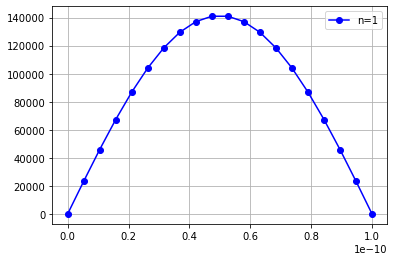

In [61]:
h = 6.62607015e-34 # in J s
m = 9.10938356e-31 # 전자의 무게 in kg 
L = 1e-10 # 상자의 크기 in m <- 전자가 있는 공간의 크기와 유사하게 설정

n=1
E_1 = n**2 * h**2 / (8*m*L**2)
print(E_1, 'J')

x = np.linspace(0,L,20)

def psi(x,n):
    return np.sqrt(2/L) * np.sin(n*np.pi*x/L)

plt.plot(x, psi(x,1), 'bo-', label='n=1')

plt.grid(True)
plt.legend()
plt.show()

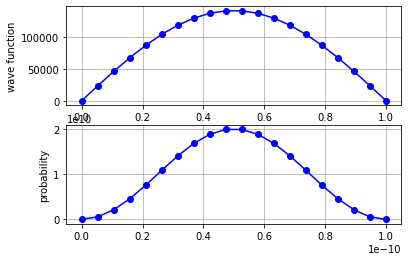

(1.0000000000000002, 1.1102230246251569e-14)


In [62]:
plt.subplot(2,1,1)
plt.ylabel('wave function')
plt.grid(True)
plt.plot(x, psi(x,1), 'bo-', label='n=1')

plt.subplot(2,1,2)
plt.ylabel('probability')
plt.grid(True)
plt.plot(x, psi(x,1)**2, 'bo-', label='n=1')

plt.show()

# 전체 범위에서 입자가 발견될 확률의 총 합
from scipy.integrate import quad 

def psi_sqr(x,n):
    psi = np.sqrt(2/L) * np.sin(n*np.pi*x/L)
    return psi**2

sum_prob = quad(psi_sqr, 0,L, args=(1))
print(sum_prob)

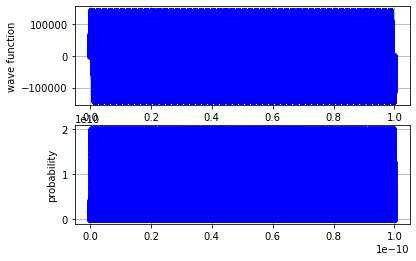

(0.9999999999999967, 1.099120794378905e-14)


In [59]:
# n이 높을 경우

n=100
x=np.linspace(0,L, 10000)

plt.subplot(2,1,1)
plt.ylabel('wave function')
plt.grid(True)
plt.plot(x, psi(x,n), 'bo-', label='n=1')

plt.subplot(2,1,2)
plt.ylabel('probability')
plt.grid(True)
plt.plot(x, psi(x,n)**2, 'bo-', label='n=1')

plt.show()

sum_prob = quad(psi_sqr, 0,L, args=(100))
print(sum_prob)

### 조화 진동자 포텐셜(진자운동)
$ V(x) = \frac{1}{2}kx^2$  ($k$: 스프링상수)

$ E_n = \big(n+\frac{1}{2} \big) h \nu \;\;\; n=0, 1, 2, 3, ...$ ($\nu$: 주파수)

주파수 $ \nu = \dfrac{1}{2\pi} \sqrt{\dfrac{k}{m}}$

n=0,1,2,... 에 대한 파동함수 표현식


$ \psi_0(x) = \Big( \dfrac{\alpha}{\pi} \Big)^{1/4} e^{-\alpha x^2/2} $  
$ \psi_1(x) = \Big( \dfrac{4\alpha^3}{\pi} \Big)^{1/4} e^{-\alpha x^2/2} $

이때, 상수 $ \alpha = \dfrac{2\pi}{h}(k\mu)^{1/2}$ ($\mu$: 질량 m)


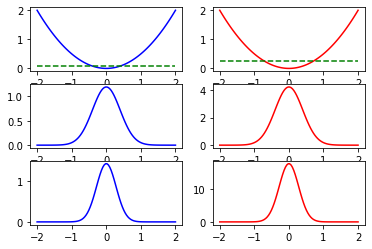

E_0 = 0.07957747154594767 , E_1 = 0.238732414637843


In [69]:
# 상수값을 임의로 배정
m = 1
k = 1
h = 1

nu = 1/(2*np.pi) * np.sqrt(k/m)
alpha = 2*np.pi/h * np.sqrt(k*m)

x = np.linspace(-2,2,100)
V = 0.5 * k * x**2

psi_0 = (alpha/np.pi)**0.25 * np.exp(-alpha*x**2 / 2)
psi_1 = (4*alpha**3/np.pi)**0.25 * np.exp(-alpha*x**2 / 2)

prob_0 = psi_0**2
prob_1 = psi_1**2

e_0 = 0.5 * h * nu
e_1 = 1.5 * h * nu

plt.subplot(3,2,1)
plt.plot(x,V, 'b')
plt.plot(x,x*0+e_0, 'g--')

plt.subplot(3,2,2)
plt.plot(x,V, 'r')
plt.plot(x,x*0+e_1, 'g--')

plt.subplot(3,2,3)
plt.plot(x, psi_0, 'b')

plt.subplot(3,2,4)
plt.plot(x, psi_1, 'r')

plt.subplot(3,2,5)
plt.plot(x, prob_0, 'b')

plt.subplot(3,2,6)
plt.plot(x, prob_1, 'r')

plt.show()


print('E_0 =', e_0,',','E_1 =', e_1)